In [1]:
import numpy as np
import matplotlib.pyplot as plt

** Get the input data  and save into X and Y matrices **

In [25]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

In [31]:
def matrix (inputarray):
    '''
    Takes numpy arrays of size m x n+1, where m is the number of rows and n is the number columns in X (not including x0)
    and the last column of the array is the Y vector. e.g.: x1,x2,...,xn, Y and then returns two numpy arrays:
         - X: X0,X1,X2,...,Xn where X0 is the ones vector size m
         - Y: Y 
    '''
    m = inputarray.shape[0]
    n = inputarray.shape[1]-1
    
    x0 = np.ones((m,1)).reshape(m,1) # Reshape to make sure it is a column
    X = inputarray[:,0:n] # Matrix x1 to xn, note is the matrix wihtout x0
    X = np.c_[x0,X] # Maxtrix X, the matrix x0, x1, ... xn
    
    y = inputarray[:,-1].reshape(m,1)  # Reshape to make sure it is a column
    
    return X, y

In [48]:
X = matrix(data)[0]
y = matrix(data)[1]

** Visualise Data **

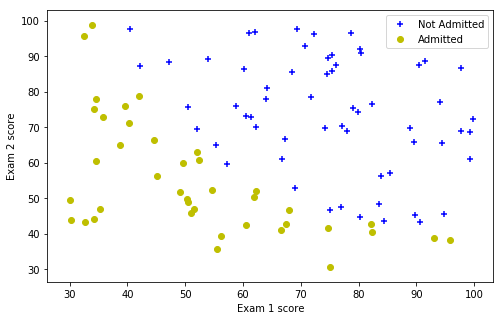

In [172]:
pos = np.where(y == 1)[0] # Creates a vector with the positions where y=1, admitted
neg = np.where(y == 0)[0] # Creates a vector with the positions where y=0, not admitted

plt.figure(figsize=(8,5))
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='o', c='y')


plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])

plt.show()

** Define the Sigmoid function **
\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}

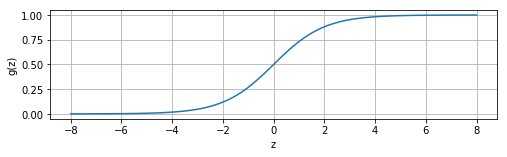

In [166]:
def sigmoid (z):
    '''
    Takes scalar or np.array to calculate the element-wise sigmoid function and returns scalar or np.array
    '''
    return 1/(1+np.exp(-z))

sigX =  np.linspace(-8,8,100)
sigY =  sigmoid(sigX)

plt.figure(figsize=(8,2))
plt.plot(sigX,sigY)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)

plt.show()



** Define the Cost Function and Gradient **

We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.

Instead, our cost function for logistic regression looks like:

\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}



When y = 1, we get the following plot for J(θ) vs h(θ):

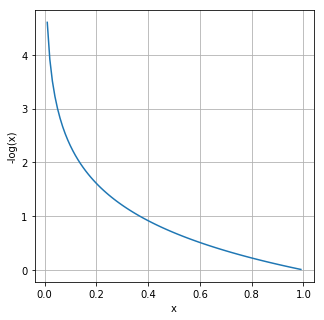

In [191]:
logX =  np.linspace(0.01,.99,100)
logY =  -np.log(logX)

plt.figure(figsize=(5,5))
plt.plot(logX,logY)
plt.xlabel('x')
plt.ylabel('-log(x)')
plt.grid(True)

plt.show()


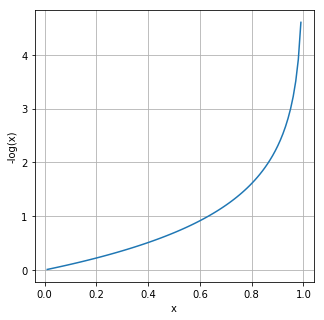

In [190]:
logX =  np.linspace(0.01,0.99,100)
logY =  -np.log(1-logX)

plt.figure(figsize=(5,5))
plt.plot(logX,logY)
plt.xlabel('x')
plt.ylabel('-log(x)')
plt.grid(True)

plt.show()

\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}
